In [4]:
import math
import numpy as np
from random import randint, seed
import random
from mpl_toolkits.mplot3d import axes3d

import matplotlib.pyplot as plt

def generateSet(prototype,nbrEchantillon,coef):
    rand_value=np.random.randn(len(prototype),len(prototype[0]))/coef
    #print(rand_value)
    rand_set=prototype+rand_value
    if nbrEchantillon == 0 :
        return prototype
    else:
        return np.concatenate((rand_set,generateSet(prototype,nbrEchantillon-1,coef)))

def addEtiquette(entreeSet,etiquette):
    dataEtiquete=[]
    for val in entreeSet:
        dataEtiquete.append([val,etiquette])
    return dataEtiquete    
    
def neuroneCore(entre,W,biais):
    return np.dot(entre,W.T)-biais
    
def limiter(a):
    if a > 0:
        return 1
    return 0

def sigmoid(a):
    return 1 / (1 + math.exp(-a))
    
def neuroneLim(entre,W,biais):
    a=neuroneCore(entre,W,biais)
    return limiter(a)

def neuroneSig(entre,W,biais):
    a=neuroneCore(entre,W,biais)
    return sigmoid(a)

def majW(W, sortie, etiquette,entree):
    #print(W, sortie, etiquette,entree)
    return W+(etiquette-sortie)*entree

def reduceSize(data):
    rtnValue=[]
    for (dat,etiq) in data:
        rtnValue.append([np.array([dat[0],dat[1]]),etiq])
    return rtnValue

In [5]:
W=np.array([[1, 1, 1, 0]])
biais=1.5

pasteque=np.array([[0.2, 0.3, 0.2, 0.95]])
anana=np.array([[0.8, 0.65, 0.6, 0.8]])

print(neuroneSig(pasteque,W,biais))
print(neuroneSig(anana,W,biais))

0.31002551887238755
0.6341355910108007


In [6]:
W=np.array([[3.40784321, 2.44027133, 2.17143355, -1.26320997]])


In [7]:
pasteques=generateSet(pasteque,1999,4)
ananas=generateSet(anana,1999,4)
pasteques2=addEtiquette(pasteques,0)
ananas2=addEtiquette(ananas,1)

datas=pasteques2+ananas2
random.shuffle(datas)
print(len(datas))
datasApprentissage=datas[:3000]
datasTest=datas[3000:]
print(len(datasApprentissage)+len(datasTest))


4000
4000


In [8]:
biaisFactor=np.array([[1, 1, 1, 1]])
marjMin=0.25
marjMax=0.75

print("W initial:",W,biais)    
for (val,etiquete) in datasApprentissage:
    sortie=neuroneSig(val,W,biais)
    if(sortie < marjMin) or (sortie > marjMax):
        W=majW(W, sortie, etiquete,val)
        biais=(np.dot(W,biaisFactor.T))/2
    
print("W final:",W,biais) 

W initial: [[ 3.40784321  2.44027133  2.17143355 -1.26320997]] 1.5
W final: [[21.71156924 15.86331651 17.27152966  6.93354184]] [[30.88997862]]


In [9]:
print(neuroneSig(pasteque,W,biais))
print(neuroneSig(anana,W,biais))

7.909017019469753e-06
0.9999969494443846


In [10]:
erreur=[]
patequesTestIsP=[]
patequesTestIsA=[]
ananasTestIsP=[]
ananasTestIsA=[]
#Revoir comment construire le taux d'erreur
for (val,etiquete) in datasTest:
    sortie=neuroneSig(val,W,biais)
    if (sortie > marjMin) and (sortie < marjMax):
        erreur.append(val)
    if (sortie < marjMin) :
        if etiquete == 0:
            patequesTestIsP.append(val)
        if etiquete == 1:
            patequesTestIsA.append(val)
    if (sortie > marjMax):
        if etiquete == 0:
            ananasTestIsP.append(val)
        if etiquete == 1:
            ananasTestIsA.append(val)

print(len(erreur),":",len(datasTest))
print(len(patequesTestIsP),":",len(datasTest))
print(len(patequesTestIsA),":",len(datasTest))
print(len(ananasTestIsP),":",len(datasTest))
print(len(ananasTestIsA),":",len(datasTest))

erreur=np.array(erreur)
patequesTestIsP=np.array(patequesTestIsP)
patequesTestIsA=np.array(patequesTestIsA)
ananasTestIsP=np.array(ananasTestIsP)
ananasTestIsA=np.array(ananasTestIsA)

33 : 1000
452 : 1000
29 : 1000
32 : 1000
454 : 1000


Text(0, 0.5, 'couleur')

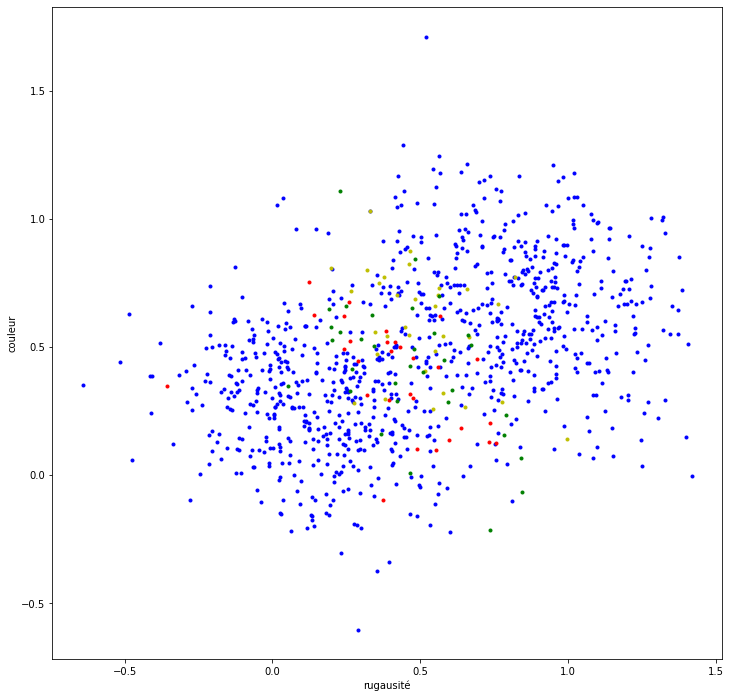

In [11]:
fig = plt.figure(1,figsize=(12,12))

plt.plot(np.array(patequesTestIsP).T[0],patequesTestIsP.T[1],"b.")
plt.plot(ananasTestIsA.T[0],ananasTestIsA.T[1],"b.")
plt.plot(patequesTestIsA.T[0],patequesTestIsA.T[1],"r.")
plt.plot(ananasTestIsP.T[0],ananasTestIsP.T[1],"y.")
plt.plot(erreur.T[0],erreur.T[1],"g.")
plt.xlabel('rugausité')
plt.ylabel('couleur')

In [12]:
W=np.array([[1, 1]])#, 1, 0]])
biais=1.5

pasteque=np.array([[0.2, 0.3]])#, 0.2, 0.95]])
anana=np.array([[0.8, 0.65]])#, 0.6, 0.8]])

print(neuroneSig(pasteque,W,biais))
print(neuroneSig(anana,W,biais))

0.2689414213699951
0.48750260351578967


In [13]:
#print(datasApprentissage)  
    

In [14]:

biaisFactor=np.array([[1, 1]])#, 1, 1]])
marjMin=0.25
marjMax=0.75

datasApprentissage=reduceSize(datasApprentissage)
#print(datasApprentissage)
print("W initial:",W,biais)    
for (val,etiquete) in datasApprentissage:
    sortie=neuroneSig(val,W,biais)
    if(sortie < marjMin) or (sortie > marjMax):
        W=majW(W, sortie, etiquete,val)
        biais=(np.dot(W,biaisFactor.T))/2
    
print("W final:",W,biais) 

W initial: [[1 1]] 1.5
W final: [[15.58938262 10.56029933]] [[13.07484097]]


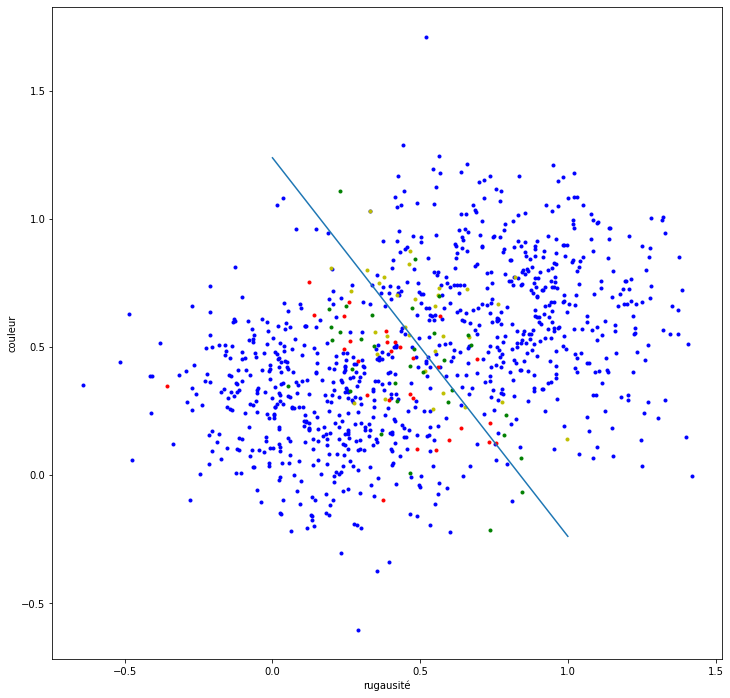

In [15]:
fig = plt.figure(1,figsize=(12,12))

plt.plot(patequesTestIsP.T[0],patequesTestIsP.T[1],"b.")
plt.plot(ananasTestIsA.T[0],ananasTestIsA.T[1],"b.")
plt.plot(patequesTestIsA.T[0],patequesTestIsA.T[1],"r.")
plt.plot(ananasTestIsP.T[0],ananasTestIsP.T[1],"y.")
plt.plot(erreur.T[0],erreur.T[1],"g.")
plt.xlabel('rugausité')
plt.ylabel('couleur')

x=np.linspace(0,1,10)
plt.plot(x,(biais[0][0]-W[0][0]*x)/W[0][1])